<a href="https://colab.research.google.com/github/SwapnasumaM/Semmelweis-and-the-Discovery-of-Handwashing/blob/main/SwapnaSumaM_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
yearly=pd.read_csv('/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


Task 2

In [ ]:
yearly['proportion_deaths'] = (yearly['deaths'] / yearly['births']) * 100
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']
print(yearly1)
print(yearly2)



   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           7.806324
1  1842    3287     518  clinic 1          15.759051
2  1843    3060     274  clinic 1           8.954248
3  1844    3157     260  clinic 1           8.235667
4  1845    3492     241  clinic 1           6.901489
5  1846    4010     459  clinic 1          11.446384
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           3.521704
7   1842    2659     202  clinic 2           7.596841
8   1843    2739     164  clinic 2           5.987587
9   1844    2956      68  clinic 2           2.300406
10  1845    3241      66  clinic 2           2.036409
11  1846    3754     105  clinic 2           2.797017


Task 3

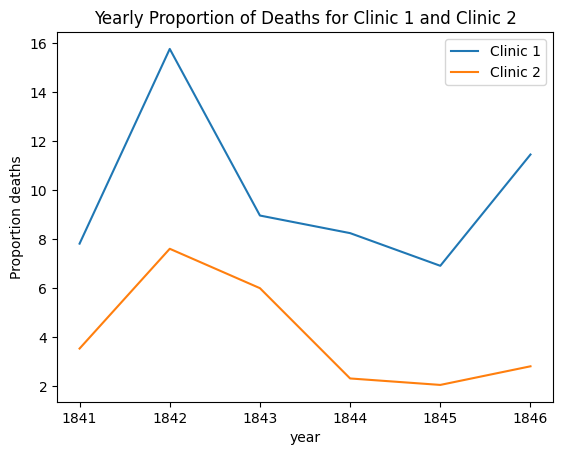

In [ ]:
ax = yearly1.plot(x='year', y='proportion_deaths', label='Clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='Clinic 2', ax=ax)
import matplotlib.pyplot as plt
plt.ylabel('Proportion deaths')
plt.title('Yearly Proportion of Deaths for Clinic 1 and Clinic 2')

# Show the plot
plt.show()


In [ ]:

monthly = pd.read_csv('/monthly_deaths.csv', parse_dates=['date'])

# Calculate the proportion of deaths per number of births
monthly['proportion_deaths'] = (monthly['deaths'] / monthly['births']) * 100
print(monthly.head())

        date  births  deaths  proportion_deaths
0 1841-01-01     254      37          14.566929
1 1841-02-01     239      18           7.531381
2 1841-03-01     277      12           4.332130
3 1841-04-01     255       4           1.568627
4 1841-05-01     255       2           0.784314


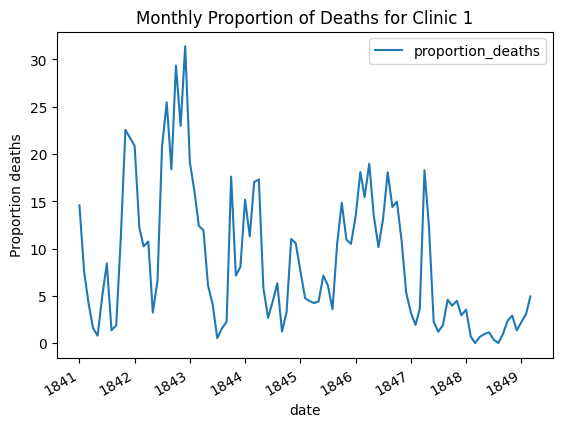

In [ ]:
ax = monthly.plot(x='date', y='proportion_deaths')

# Customize the plot
plt.ylabel('Proportion deaths')
plt.title('Monthly Proportion of Deaths for Clinic 1')

# Show the plot
plt.show()

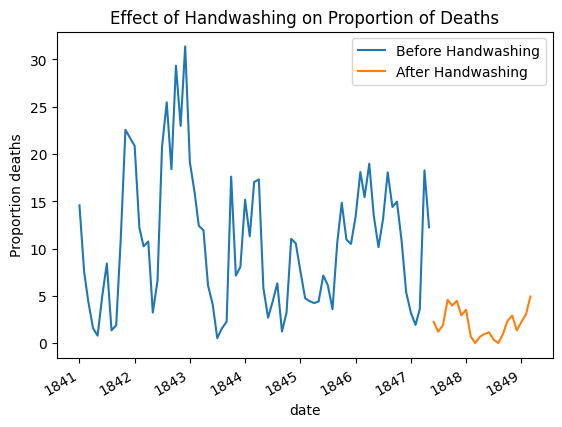

In [ ]:
handwashing_start = pd.to_datetime('1847-06-01')

# Split the data into before_washing and after_washing
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plotting the effect of handwashing on the proportion of deaths
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before Handwashing')
after_washing.plot(x='date', y='proportion_deaths', label='After Handwashing', ax=ax)

# Customize the plot
plt.ylabel('Proportion deaths')
plt.title('Effect of Handwashing on Proportion of Deaths')

# Show the plot
plt.show()









In [ ]:
before_proportion = before_washing['proportion_deaths']

# Select the proportion_deaths column from after_washing
after_proportion = after_washing['proportion_deaths']

# Calculate the difference in mean monthly proportion of deaths
mean_difference = after_proportion.mean() - before_proportion.mean()

# Print the result
print("Average reduction in proportion of deaths:", mean_difference)

Average reduction in proportion of deaths: -8.395660751183334


In [ ]:
np.random.seed(42)

# Define the number of bootstrap samples
num_bootstrap_samples = 3000

# Initialize the list to store bootstrapped differences in means
boot_mean_diff = []

# Perform bootstrap analysis
for _ in range(num_bootstrap_samples):
    # Sample with replacement from before_proportion and calculate the mean
    boot_before = np.random.choice(before_proportion, size=len(before_proportion), replace=True)
    mean_before = boot_before.mean()
    boot_after = np.random.choice(after_proportion, size=len(after_proportion), replace=True)
    mean_after = boot_after.mean()
    
    # Calculate the difference in means and append to boot_mean_diff
    boot_mean_diff.append(mean_after - mean_before)

# Calculate the 95% confidence interval
confidence_interval = np.percentile(boot_mean_diff, [2.5, 97.5])

# Print the results
print("95% Confidence Interval:", confidence_interval)  

95% Confidence Interval: [-10.10710495  -6.74776218]


Based on the data collected by Semmelweis, it is True that doctors should wash their hands. Semmelweis observed a significant reduction in the proportion of deaths after implementing handwashing practices in the clinic. The data showed that the proportion of deaths decreased drastically after doctors started washing their hands with chlorinated lime solution. This led Semmelweis to conclude that handwashing is an effective measure in preventing the spread of infections and reducing mortality rates. Thus, the data strongly supports the importance of handwashing for doctors and healthcare professionals.